In [3]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from numpy import polyfit, poly1d
import pandas as pd
from scipy.signal import lfilter, savgol_filter
%matplotlib inline
import plotly.express as px
import plotly.graph_objects as go
from scipy import stats
from plotly.subplots import make_subplots
import pingouin as pg
import seaborn as sns 
from statannot import add_stat_annotation
from palettable.colorbrewer.qualitative import Set2_7

D:\apps\Anaconda\lib\site-packages\outdated\utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.3.11, the latest is 0.5.1.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


In [4]:


G_All = pd.read_csv('./Results/all/G_all_27.csv')#17
B_All = pd.read_csv('./Results/all/B_all_27.csv')#23
P_All = pd.read_csv('./Results/all/P_all_27.csv') #23
W_All = pd.read_csv('./Results/all/W_all_27.csv')



D:\apps\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (70) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [5]:
### drop subject without data
# print(G_All.shape)
G_fliterd = G_All.loc[(G_All.SubjectNO !=17 ) & (G_All.SubjectNO != 23)]
# print(G_fliterd.shape)
B_fliterd = B_All.loc[(B_All.SubjectNO !=17 ) & (B_All.SubjectNO != 23)]
P_fliterd = P_All.loc[(P_All.SubjectNO !=17 ) & (P_All.SubjectNO != 23)]
W_fliterd = W_All.loc[(W_All.SubjectNO !=17 ) & (W_All.SubjectNO != 23)]

In [45]:
### get mean value of each trials 
def getTotalMean(df):
    grouped_Sub_Con = df.groupby(['SubjectNO','Conditions'])
    df_new =grouped_Sub_Con["right_cogload_to0"].mean()
    df_mean= df_new.to_frame()
    df_mean = df_mean.assign(  group=grouped_Sub_Con['Conditions'].max())
    df_mean = df_mean.assign(  subject=grouped_Sub_Con['SubjectNO'].max())
    df_mean['group']= df_mean['group'].str.strip() ## delete space
    # print(df_mean)
    df_mean.boxplot(by ='Conditions', column =['right_cogload_to0'], grid = False)
    return df_mean

def calculateWilcoxon(df):
    df_c = df.loc[(df.group == 'control' )]
    df_Anc = df.loc[(df.group == 'Anchoring' )]
    df_Asy = df.loc[(df.group == 'Asynchronized' )]
    df_Syn = df.loc[(df.group == 'Synchronized' )]

    TB = df_c.right_cogload_to0
    TH = df_Anc.right_cogload_to0
    TV = df_Asy.right_cogload_to0
    TM = df_Syn.right_cogload_to0

    print('Control vs Anchoring')
    print(pg.wilcoxon(TB, TH, tail='one-sided'))
    print('Control vs Asynchronized')
    print(pg.wilcoxon(TB,TV, tail='one-sided'))
    print('Control vs Synchronized')
    print(pg.wilcoxon(TB, TM, tail='one-sided'))
    print('Anchoring vs Asynchronized')
    print(pg.wilcoxon(TH, TV, tail='one-sided'))
    print('Anchoring vs Synchronized')
    print(pg.wilcoxon(TH, TM, tail='one-sided'))
    print('Asynchronized vs Synchronized')
    print(pg.wilcoxon(TV, TM, tail='one-sided'))
    

Control vs Anchoring
          W-val  tail     p-val       RBC    CLES
Wilcoxon  137.0  less  0.253852 -0.156923  0.5936
Control vs Asynchronized
          W-val  tail     p-val       RBC    CLES
Wilcoxon  114.0  less  0.100108 -0.298462  0.5744
Control vs Synchronized
          W-val  tail     p-val       RBC    CLES
Wilcoxon  138.0  less  0.262456 -0.150769  0.5504
Anchoring vs Asynchronized
          W-val  tail     p-val       RBC    CLES
Wilcoxon  152.0  less  0.395738 -0.064615  0.4688
Anchoring vs Synchronized
          W-val     tail     p-val       RBC    CLES
Wilcoxon  176.0  greater  0.365495  0.083077  0.5424
Asynchronized vs Synchronized
          W-val     tail     p-val       RBC    CLES
Wilcoxon  193.0  greater  0.213071  0.187692  0.4928


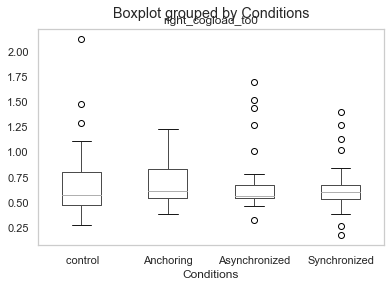

In [80]:
B_fliterd_mean = getTotalMean(B_fliterd)
calculateWilcoxon(B_fliterd_mean)

Control vs Anchoring
          W-val  tail     p-val       RBC   CLES
Wilcoxon  152.0  less  0.395738 -0.064615  0.496
Control vs Asynchronized
          W-val  tail     p-val       RBC    CLES
Wilcoxon  138.0  less  0.262456 -0.150769  0.5376
Control vs Synchronized
          W-val     tail     p-val       RBC    CLES
Wilcoxon  189.0  greater  0.245393  0.163077  0.5872
Anchoring vs Asynchronized
          W-val  tail    p-val       RBC    CLES
Wilcoxon  108.0  less  0.07424 -0.335385  0.5568
Anchoring vs Synchronized
          W-val     tail     p-val   RBC  CLES
Wilcoxon  208.0  greater  0.115181  0.28   0.6
Asynchronized vs Synchronized
          W-val     tail     p-val       RBC    CLES
Wilcoxon  259.0  greater  0.004034  0.593846  0.6608


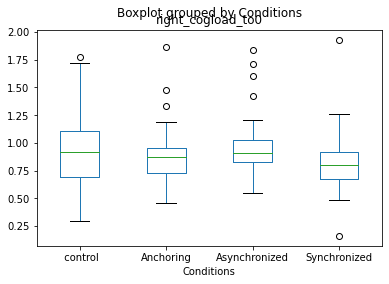

In [115]:
P_fliterd_mean = getTotalMean(P_fliterd)
calculateWilcoxon(P_fliterd_mean)

In [147]:
def stars(p):
   if p < 0.0001:
       return "****"
   elif (p < 0.001):
       return "***"
   elif (p < 0.01):
       return "**"
   elif (p < 0.05):
       return "*"
   else:
       return "-"

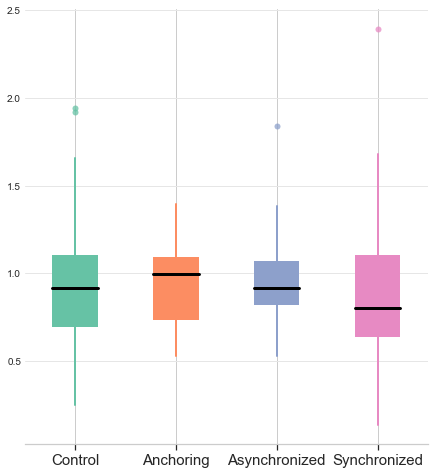

In [165]:
### plot 

df = G_fliterd_e
df_c = df.loc[(df.group == 'control' )]
df_Anc = df.loc[(df.group == 'Anchoring' )]
df_Asy = df.loc[(df.group == 'Asynchronized' )]
df_Syn = df.loc[(df.group == 'Synchronized' )]

Con = df_c.right_cogload_to0
Anc = df_Anc.right_cogload_to0
Asy = df_Asy.right_cogload_to0
Syn = df_Syn.right_cogload_to0


fig = plt.figure()
ax = fig.add_subplot(111)
bp = ax.boxplot([Con, Anc,Asy,Syn])

params = {
   'axes.labelsize': 8,
   'font.size': 8,
   'legend.fontsize': 10,
   'xtick.labelsize': 15,
   'ytick.labelsize': 10,
   'text.usetex': False,
   'figure.figsize': [8, 8]
}
plt.rcParams.update(params)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()
ax.tick_params(axis='x', direction='out')
ax.tick_params(axis='y', length=0)

ax.grid(axis='y', color="0.9", linestyle='-', linewidth=1)
ax.set_axisbelow(True)


colors = Set2_7.mpl_colors

for i in range(0, len(bp['boxes'])):
   bp['boxes'][i].set_color(colors[i])
   # we have two whiskers!
   bp['whiskers'][i*2].set_color(colors[i])
   bp['whiskers'][i*2 + 1].set_color(colors[i])
   bp['whiskers'][i*2].set_linewidth(2)
   bp['whiskers'][i*2 + 1].set_linewidth(2)
   # fliers
   # (set allows us to set many parameters at once)
   bp['fliers'][i].set(markerfacecolor=colors[i],
                   marker='o', alpha=0.75, markersize=6,
                   markeredgecolor='none')
   bp['medians'][i].set_color('black')
   bp['medians'][i].set_linewidth(3)
   # and 4 caps to remove
   for c in bp['caps']:
       c.set_linewidth(0)

for i in range(len(bp['boxes'])):
   box = bp['boxes'][i]
   box.set_linewidth(0)
   boxX = []
   boxY = []
   for j in range(5):
       boxX.append(box.get_xdata()[j])
       boxY.append(box.get_ydata()[j])
       boxCoords = list(zip(boxX,boxY))
       boxPolygon = plt.Polygon(boxCoords, facecolor = colors[i], linewidth=0)
       ax.add_patch(boxPolygon)

fig.subplots_adjust(left=0.2)
ax.set_xticklabels(['Control','Anchoring','Asynchronized','Synchronized'])

y_max = np.max(np.concatenate((Con, Anc,Asy,Syn)))
y_min = np.min(np.concatenate((Con, Anc,Asy,Syn)))


# ax.annotate("", xy=(1, y_max), xycoords='data',
#            xytext=(2, y_max), textcoords='data',
#            arrowprops=dict(arrowstyle="-", ec='#aaaaaa',
#                            connectionstyle="bar,fraction=0.2"))
# ax.text(1.5, y_max + abs(y_max - y_min)*0.1, stars(p_value),
#        horizontalalignment='center',
#        verticalalignment='center')

Control vs Anchoring
          W-val     tail     p-val       RBC    CLES
Wilcoxon  181.0  greater  0.316913  0.113846  0.5104
Control vs Asynchronized
          W-val  tail     p-val       RBC    CLES
Wilcoxon  183.0  less  0.710897  0.126154  0.4784
Control vs Synchronized
          W-val     tail     p-val       RBC    CLES
Wilcoxon  197.0  greater  0.183293  0.212308  0.5488
Anchoring vs Asynchronized
          W-val  tail     p-val       RBC    CLES
Wilcoxon  161.0  less  0.489458 -0.009231  0.4752
Anchoring vs Synchronized
          W-val     tail     p-val       RBC   CLES
Wilcoxon  188.0  greater  0.253852  0.156923  0.528
Asynchronized vs Synchronized
          W-val  tail     p-val       RBC    CLES
Wilcoxon  170.0  less  0.583745  0.046154  0.5184


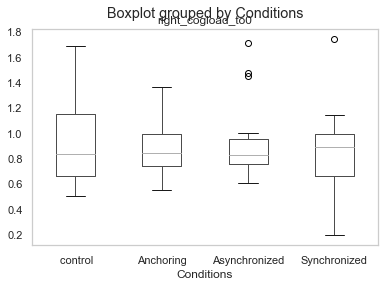

In [82]:
W_fliterd_mean = getTotalMean(W_fliterd)
calculateWilcoxon(W_fliterd_mean)

Control vs Anchoring
          W-val  tail    p-val       RBC    CLES
Wilcoxon  167.0  less  0.55257  0.027692  0.5248
Control vs Asynchronized
          W-val  tail     p-val       RBC    CLES
Wilcoxon  129.0  less  0.190492 -0.206154  0.5664
Control vs Synchronized
          W-val  tail  p-val       RBC  CLES
Wilcoxon  162.0  less    0.5 -0.003077  0.52
Anchoring vs Asynchronized
          W-val  tail     p-val       RBC    CLES
Wilcoxon  107.0  less  0.070458 -0.341538  0.5616
Anchoring vs Synchronized
          W-val     tail  p-val       RBC    CLES
Wilcoxon  163.0  greater    0.5  0.003077  0.4944
Asynchronized vs Synchronized
          W-val     tail    p-val       RBC    CLES
Wilcoxon  217.0  greater  0.07424  0.335385  0.5552


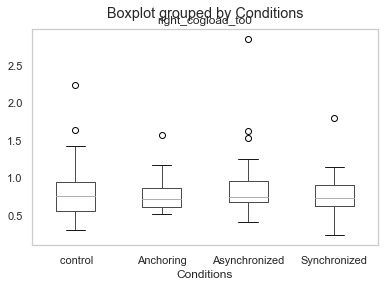

In [83]:
G_fliterd_mean = getTotalMean(G_fliterd)
calculateWilcoxon(G_fliterd_mean)

In [8]:
### get 20s data 
def getStart(df,duration):
    grouped_Sub_label = df.groupby(['SubjectNO','Conditions'])
    grouped_Sub_Con = df.groupby(['SubjectNO','Conditions'])['right_cogload_to0'].apply(lambda grp: grp.head(duration).mean())
    # print(grouped_Sub_Con)
    df_mean= grouped_Sub_Con.to_frame()
    df_mean = df_mean.assign(  group=grouped_Sub_label['Conditions'].max())
    df_mean = df_mean.assign(  subject=grouped_Sub_label['SubjectNO'].max())
    df_mean['group']= df_mean['group'].str.strip() ## delete space
    # print(df_mean)
    df_mean.boxplot(by ='Conditions', column =['right_cogload_to0'], grid = False)
   
    return df_mean

### get 20s data 
def getEnd(df,duration):
    grouped_Sub_label = df.groupby(['SubjectNO','Conditions'])
    grouped_Sub_Con = df.groupby(['SubjectNO','Conditions'])['right_cogload_to0'].apply(lambda grp: grp.tail(duration).mean())
    # print(grouped_Sub_Con)
    df_mean= grouped_Sub_Con.to_frame()
    df_mean = df_mean.assign(  group=grouped_Sub_label['Conditions'].max())
    df_mean = df_mean.assign(  subject=grouped_Sub_label['SubjectNO'].max())
    df_mean['group']= df_mean['group'].str.strip() ## delete space
    # print(df_mean)
    df_mean.boxplot(by ='Conditions', column =['right_cogload_to0'], grid = False)
   
    return df_mean

In [90]:
def calculateWilcoxon_start_end(df,df_end):
    df_c = df.loc[(df.group == 'control' )]
    df_Anc = df.loc[(df.group == 'Anchoring' )]
    df_Asy = df.loc[(df.group == 'Asynchronized' )]
    df_Syn = df.loc[(df.group == 'Synchronized' )]

    df_c_e = df_end.loc[(df_end.group == 'control' )]
    df_Anc_e = df_end.loc[(df_end.group == 'Anchoring' )]
    df_Asy_e = df_end.loc[(df_end.group == 'Asynchronized' )]
    df_Syn_e = df_end.loc[(df_end.group == 'Synchronized' )]


    TB = df_c.right_cogload_to0
    TH = df_Anc.right_cogload_to0
    TV = df_Asy.right_cogload_to0
    TM = df_Syn.right_cogload_to0

    
    TB_e = df_c_e.right_cogload_to0
    TH_e = df_Anc_e.right_cogload_to0
    TV_e = df_Asy_e.right_cogload_to0
    TM_e = df_Syn_e.right_cogload_to0

    print('Control')
    print(pg.wilcoxon(TB, TB_e, tail='one-sided'))
    print('Asynchronized')
    print(pg.wilcoxon(TV,TV_e, tail='one-sided'))
    print('Synchronized')
    print(pg.wilcoxon(TM, TM_e, tail='one-sided'))
    print('Anchoring')
    print(pg.wilcoxon(TH, TH_e, tail='one-sided'))

def ReturnFourConditions(df):
    df_c = df.loc[(df.group == 'control' )]
    df_Anc = df.loc[(df.group == 'Anchoring' )]
    df_Asy = df.loc[(df.group == 'Asynchronized' )]
    df_Syn = df.loc[(df.group == 'Synchronized' )]

    return df_c,df_Anc,df_Asy,df_Syn




Control
          W-val     tail     p-val       RBC    CLES
Wilcoxon   21.0  greater  0.762234 -0.236364  0.4856
Asynchronized
          W-val  tail    p-val       RBC    CLES
Wilcoxon  157.0  less  0.44743 -0.033846  0.5424
Synchronized
          W-val  tail     p-val   RBC    CLES
Wilcoxon   87.0  less  0.037073 -0.42  0.5752
Anchoring
          W-val  tail     p-val       RBC    CLES
Wilcoxon   99.0  less  0.045158 -0.390769  0.6192


D:\apps\Anaconda\lib\site-packages\scipy\stats\morestats.py:2957: UserWarning: Exact p-value calculation does not work if there are ties. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
D:\apps\Anaconda\lib\site-packages\scipy\stats\morestats.py:2957: UserWarning: Exact p-value calculation does not work if there are ties. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


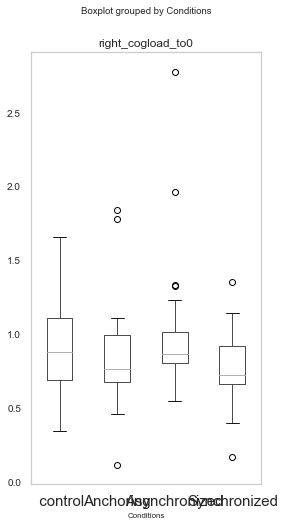

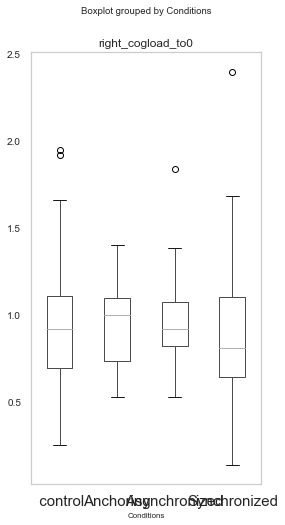

In [160]:
duration = 90*20
G_fliterd_s = getStart(P_fliterd,duration)
G_fliterd_e = getEnd(P_fliterd,duration)
calculateWilcoxon_start_end(G_fliterd_s,G_fliterd_e)

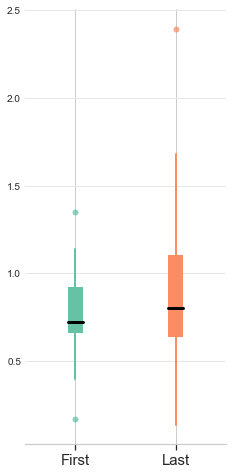

In [159]:
### plot 
df = G_fliterd_s
df_end = G_fliterd_e
df_c = df.loc[(df.group == 'control' )]
df_Anc = df.loc[(df.group == 'Anchoring' )]
df_Asy = df.loc[(df.group == 'Asynchronized' )]
df_Syn = df.loc[(df.group == 'Synchronized' )]

df_c_e = df_end.loc[(df_end.group == 'control' )]
df_Anc_e = df_end.loc[(df_end.group == 'Anchoring' )]
df_Asy_e = df_end.loc[(df_end.group == 'Asynchronized' )]
df_Syn_e = df_end.loc[(df_end.group == 'Synchronized' )]



Con = df_Syn.right_cogload_to0
Anc = df_Syn_e.right_cogload_to0



fig = plt.figure()
ax = fig.add_subplot(111)
bp = ax.boxplot([Con, Anc,])

params = {
   'axes.labelsize': 8,
   'font.size': 8,
   'legend.fontsize': 10,
   'xtick.labelsize': 15,
   'ytick.labelsize': 10,
   'text.usetex': False,
   'figure.figsize': [4, 8]
}
plt.rcParams.update(params)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()
ax.tick_params(axis='x', direction='out')
ax.tick_params(axis='y', length=0)

ax.grid(axis='y', color="0.9", linestyle='-', linewidth=1)
ax.set_axisbelow(True)


colors = Set2_7.mpl_colors

for i in range(0, len(bp['boxes'])):
   bp['boxes'][i].set_color(colors[i])
   # we have two whiskers!
   bp['whiskers'][i*2].set_color(colors[i])
   bp['whiskers'][i*2 + 1].set_color(colors[i])
   bp['whiskers'][i*2].set_linewidth(2)
   bp['whiskers'][i*2 + 1].set_linewidth(2)
   # fliers
   # (set allows us to set many parameters at once)
   bp['fliers'][i].set(markerfacecolor=colors[i],
                   marker='o', alpha=0.75, markersize=6,
                   markeredgecolor='none')
   bp['medians'][i].set_color('black')
   bp['medians'][i].set_linewidth(3)
   # and 4 caps to remove
   for c in bp['caps']:
       c.set_linewidth(0)

for i in range(len(bp['boxes'])):
   box = bp['boxes'][i]
   box.set_linewidth(0)
   boxX = []
   boxY = []
   for j in range(5):
       boxX.append(box.get_xdata()[j])
       boxY.append(box.get_ydata()[j])
       boxCoords = list(zip(boxX,boxY))
       boxPolygon = plt.Polygon(boxCoords, facecolor = colors[i], linewidth=0)
       ax.add_patch(boxPolygon)

fig.subplots_adjust(left=0.2)
ax.set_xticklabels(['First','Last'])

y_max = np.max(np.concatenate((Con, Anc,)))
y_min = np.min(np.concatenate((Con, Anc)))

In [114]:
calculateWilcoxon(G_fliterd_e)

Control vs Anchoring
          W-val  tail     p-val       RBC    CLES
Wilcoxon  150.0  less  0.375496 -0.076923  0.5312
Control vs Asynchronized
          W-val     tail     p-val       RBC   CLES
Wilcoxon  171.0  greater  0.416255  0.052308  0.464
Control vs Synchronized
          W-val  tail     p-val       RBC    CLES
Wilcoxon  171.0  less  0.594035  0.052308  0.4512
Anchoring vs Asynchronized
          W-val     tail  p-val       RBC    CLES
Wilcoxon  163.0  greater    0.5  0.003077  0.5264
Anchoring vs Synchronized
          W-val     tail     p-val       RBC    CLES
Wilcoxon  178.0  greater  0.345759  0.095385  0.5648
Asynchronized vs Synchronized
          W-val     tail     p-val       RBC    CLES
Wilcoxon  207.0  greater  0.120533  0.273846  0.5808


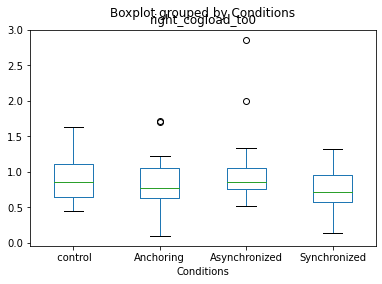

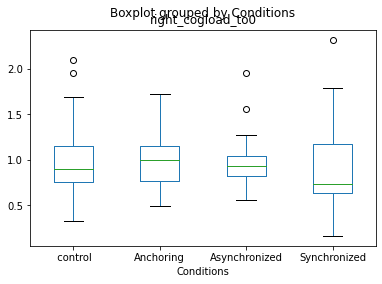

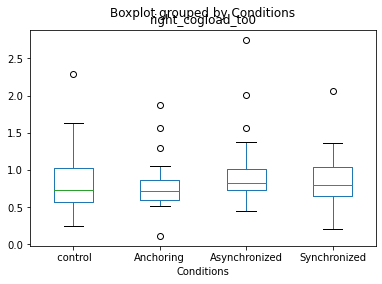

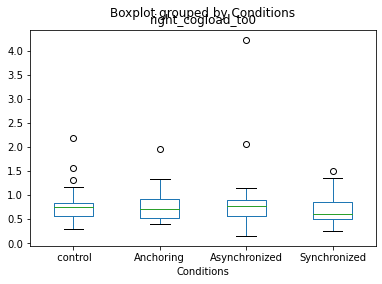

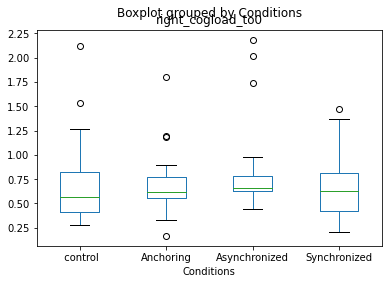

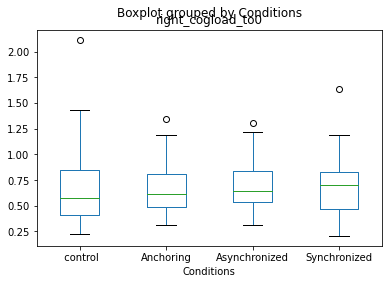

In [92]:
duration = 90*10
P_fliterd_s = getStart(P_fliterd,duration)
P_fliterd_e = getEnd(P_fliterd,duration)
G_fliterd_s = getStart(G_fliterd,duration)
G_fliterd_e = getEnd(G_fliterd,duration)
B_fliterd_s = getStart(B_fliterd,duration)
B_fliterd_e = getEnd(B_fliterd,duration)
g_df_c,g_df_Anc,g_df_Asy,g_df_Syn = ReturnFourConditions(G_fliterd_s)
b_df_c,b_df_Anc,b_df_Asy,b_df_Syn = ReturnFourConditions(B_fliterd_s)
p_df_c,p_df_Anc,p_df_Asy,p_df_Syn = ReturnFourConditions(P_fliterd_s)

g_df_c_e,g_df_Anc_e,g_df_Asy_e,g_df_Syn_e = ReturnFourConditions(G_fliterd_e)
b_df_c_e,b_df_Anc_e,b_df_Asy_e,b_df_Syn_e = ReturnFourConditions(B_fliterd_e)
p_df_c_e,p_df_Anc_e,p_df_Asy_e,p_df_Syn_e = ReturnFourConditions(P_fliterd_e)



In [95]:
control = g_df_c.right_cogload_to0 + b_df_c.right_cogload_to0+p_df_c.right_cogload_to0
Anchor = g_df_Anc.right_cogload_to0 +b_df_Anc.right_cogload_to0+p_df_Anc.right_cogload_to0
Asy = g_df_Asy.right_cogload_to0+b_df_Asy.right_cogload_to0+p_df_Asy.right_cogload_to0
Syn = g_df_Syn.right_cogload_to0+ b_df_Syn.right_cogload_to0+p_df_Syn.right_cogload_to0

control_e = g_df_c_e.right_cogload_to0 + b_df_c_e.right_cogload_to0+p_df_c_e.right_cogload_to0
Anchor_e = g_df_Anc_e.right_cogload_to0 +b_df_Anc_e.right_cogload_to0+p_df_Anc_e.right_cogload_to0
Asy_e = g_df_Asy_e.right_cogload_to0+b_df_Asy_e.right_cogload_to0+p_df_Asy_e.right_cogload_to0
Syn_e = g_df_Syn_e.right_cogload_to0+ b_df_Syn_e.right_cogload_to0+p_df_Syn_e.right_cogload_to0


print('Control')
print(pg.wilcoxon(control, control_e, tail='one-sided'))
print('Asynchronized')
print(pg.wilcoxon(Anchor,Anchor_e, tail='one-sided'))
print('Synchronized')
print(pg.wilcoxon(Asy, Asy_e, tail='one-sided'))
print('Anchoring')
print(pg.wilcoxon(Syn, Syn_e, tail='one-sided'))

Control
          W-val  tail     p-val       RBC  CLES
Wilcoxon  119.0  less  0.286828 -0.137681  0.52
Asynchronized
          W-val  tail    p-val       RBC    CLES
Wilcoxon  148.0  less  0.35558 -0.089231  0.5536
Synchronized
          W-val     tail     p-val       RBC   CLES
Wilcoxon  179.0  greater  0.336038  0.101538  0.536
Anchoring
          W-val  tail     p-val   RBC    CLES
Wilcoxon  156.0  less  0.436994 -0.04  0.4848


D:\apps\Anaconda\lib\site-packages\scipy\stats\morestats.py:2957: UserWarning: Exact p-value calculation does not work if there are ties. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


In [69]:
def GetSumMean(df1,df2,df3):
    df_c = df1.loc[(df1.group == 'control' )]
    df_Anc = df1.loc[(df1.group == 'Anchoring' )]
    df_Asy = df1.loc[(df1.group == 'Asynchronized' )]
    df_Syn = df1.loc[(df1.group == 'Synchronized' )]

    df_c2 = df2.loc[(df2.group == 'control' )]
    df_Anc2 = df2.loc[(df2.group == 'Anchoring' )]
    df_Asy2 = df2.loc[(df2.group == 'Asynchronized' )]
    df_Syn2 = df2.loc[(df2.group == 'Synchronized' )]

    
    df_c3 = df3.loc[(df3.group == 'control' )]
    df_Anc3 = df3.loc[(df3.group == 'Anchoring' )]
    df_Asy3 = df3.loc[(df3.group == 'Asynchronized' )]
    df_Syn3 = df3.loc[(df3.group == 'Synchronized' )]

    TB = df_c.right_cogload_to0 + df_c2.right_cogload_to0+df_c3.right_cogload_to0
    TH = df_Anc.right_cogload_to0 +df_Anc2.right_cogload_to0+df_Anc3.right_cogload_to0
    TV = df_Asy.right_cogload_to0+df_Asy2.right_cogload_to0+df_Asy3.right_cogload_to0
    TM = df_Syn.right_cogload_to0+ df_Syn2.right_cogload_to0+df_Syn3.right_cogload_to0
    print('Control vs Anchoring')
    print(pg.wilcoxon(TB, TH, tail='one-sided'))
    print('Control vs Asynchronized')
    print(pg.wilcoxon(TB,TV, tail='one-sided'))
    print('Control vs Synchronized')
    print(pg.wilcoxon(TB, TM, tail='one-sided'))
    print('Anchoring vs Asynchronized')
    print(pg.wilcoxon(TH, TV, tail='one-sided'))
    print('Anchoring vs Synchronized')
    print(pg.wilcoxon(TH, TM, tail='one-sided'))
    print('Asynchronized vs Synchronized')
    print(pg.wilcoxon(TV, TM, tail='one-sided'))
    
    

Control vs Anchoring
          W-val  tail     p-val       RBC    CLES
Wilcoxon  164.0  less  0.521077  0.009231  0.5264
Control vs Asynchronized
          W-val  tail     p-val       RBC   CLES
Wilcoxon  102.0  less  0.053657 -0.372308  0.632
Control vs Synchronized
          W-val  tail     p-val       RBC    CLES
Wilcoxon  154.0  less  0.416255 -0.052308  0.4944
Anchoring vs Asynchronized
          W-val  tail     p-val       RBC    CLES
Wilcoxon  105.0  less  0.063324 -0.353846  0.6352
Anchoring vs Synchronized
          W-val  tail     p-val       RBC    CLES
Wilcoxon  138.0  less  0.262456 -0.150769  0.4832
Asynchronized vs Synchronized
          W-val     tail     p-val       RBC  CLES
Wilcoxon  248.0  greater  0.010137  0.526154  0.64


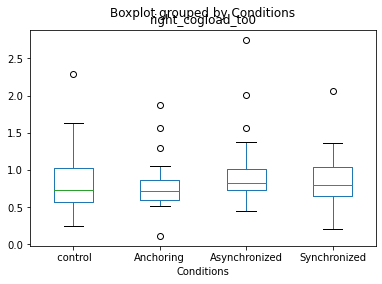

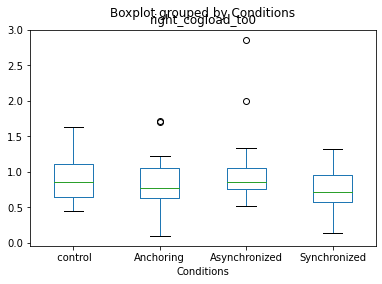

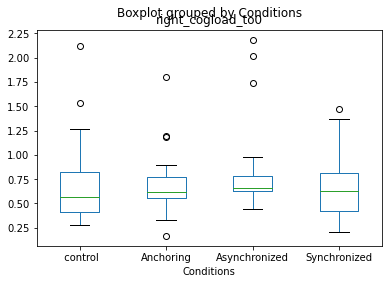

In [80]:
duration = 90*10

G_fliterd_mean = getStart(G_fliterd,duration)

P_fliterd_mean = getStart(P_fliterd,duration)

B_fliterd_mean = getStart(B_fliterd,duration)
GetSumMean(G_fliterd_mean,P_fliterd_mean,B_fliterd_mean)

Control vs Anchoring
          W-val     tail     p-val       RBC    CLES
Wilcoxon  167.0  greater  0.457902  0.027692  0.4864
Control vs Asynchronized
          W-val  tail    p-val       RBC    CLES
Wilcoxon  106.0  less  0.06682 -0.347692  0.6368
Control vs Synchronized
          W-val  tail     p-val       RBC    CLES
Wilcoxon  121.0  less  0.137592 -0.255385  0.5488
Anchoring vs Asynchronized
          W-val  tail     p-val       RBC    CLES
Wilcoxon  100.0  less  0.047867 -0.384615  0.6512
Anchoring vs Synchronized
          W-val  tail     p-val       RBC    CLES
Wilcoxon  113.0  less  0.095407 -0.304615  0.5504
Asynchronized vs Synchronized
          W-val     tail    p-val       RBC    CLES
Wilcoxon  217.0  greater  0.07424  0.335385  0.5728


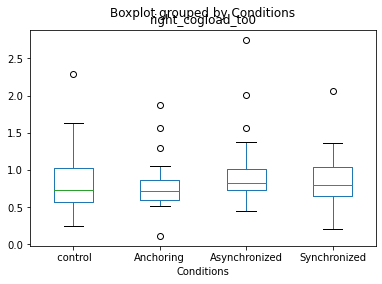

In [66]:
duration = 90*10
G_fliterd_mean = getStart(G_fliterd,duration)
calculateWilcoxon(P_fliterd_mean)

Control vs Anchoring
          W-val  tail     p-val       RBC    CLES
Wilcoxon  138.0  less  0.262456 -0.150769  0.5968
Control vs Asynchronized
          W-val  tail     p-val       RBC   CLES
Wilcoxon  110.0  less  0.082248 -0.323077  0.608
Control vs Synchronized
          W-val  tail     p-val       RBC    CLES
Wilcoxon  154.0  less  0.416255 -0.052308  0.5072
Anchoring vs Asynchronized
          W-val     tail     p-val   RBC    CLES
Wilcoxon  169.0  greater  0.436994  0.04  0.5456
Anchoring vs Synchronized
          W-val     tail     p-val       RBC    CLES
Wilcoxon  204.0  greater  0.137592  0.255385  0.5872
Asynchronized vs Synchronized
          W-val     tail     p-val       RBC   CLES
Wilcoxon  216.0  greater  0.078169  0.329231  0.576


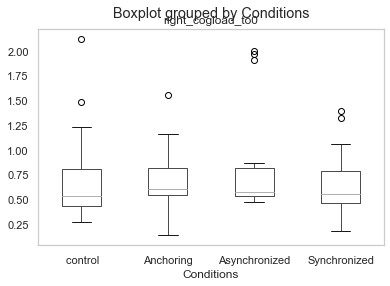

In [154]:
B_fliterd_20s = getStart(B_fliterd)
calculateWilcoxon(B_fliterd_20s)

Control vs Anchoring
          W-val     tail     p-val       RBC    CLES
Wilcoxon  184.0  greater  0.289103  0.132308  0.5296
Control vs Asynchronized
          W-val  tail     p-val       RBC   CLES
Wilcoxon  114.0  less  0.100108 -0.298462  0.584
Control vs Synchronized
          W-val  tail     p-val       RBC    CLES
Wilcoxon  138.0  less  0.262456 -0.150769  0.5424
Anchoring vs Asynchronized
          W-val  tail    p-val       RBC    CLES
Wilcoxon   81.0  less  0.01374 -0.501538  0.6752
Anchoring vs Synchronized
          W-val  tail     p-val       RBC    CLES
Wilcoxon   82.0  less  0.014789 -0.495385  0.5952
Asynchronized vs Synchronized
          W-val     tail     p-val       RBC    CLES
Wilcoxon  224.0  greater  0.050699  0.378462  0.5616


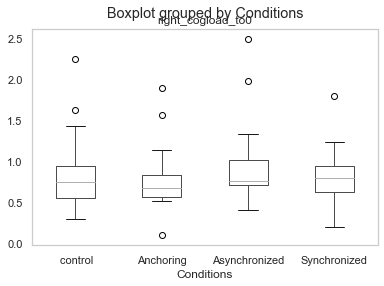

In [155]:
G_fliterd_20s = getStart(G_fliterd)
calculateWilcoxon(G_fliterd_20s)

Control vs Anchoring
          W-val     tail     p-val       RBC   CLES
Wilcoxon  171.0  greater  0.416255  0.052308  0.528
Control vs Asynchronized
          W-val  tail   p-val   RBC    CLES
Wilcoxon  169.0  less  0.5734  0.04  0.4976
Control vs Synchronized
          W-val     tail    p-val       RBC    CLES
Wilcoxon  198.0  greater  0.17626  0.218462  0.5456
Anchoring vs Asynchronized
          W-val  tail     p-val   RBC    CLES
Wilcoxon  143.0  less  0.307522 -0.12  0.5408
Anchoring vs Synchronized
          W-val     tail     p-val       RBC  CLES
Wilcoxon  171.0  greater  0.416255  0.052308  0.52
Asynchronized vs Synchronized
          W-val     tail     p-val       RBC    CLES
Wilcoxon  188.0  greater  0.253852  0.156923  0.5344


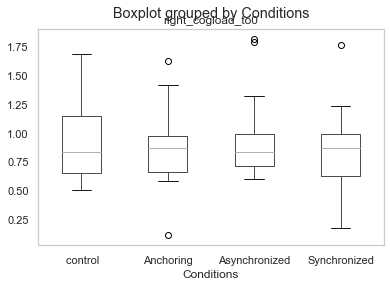

In [156]:
W_fliterd_20s = getStart(W_fliterd)
calculateWilcoxon(W_fliterd_20s)

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Using zero_method  wilcox
control v.s. Anchoring: Wilcoxon test (paired samples), P_val=3.957e-01 stat=1.520e+02
Using zero_method  wilcox
control v.s. Asynchronized: Wilcoxon test (paired samples), P_val=2.625e-01 stat=1.380e+02
Using zero_method  wilcox
control v.s. Synchronized: Wilcoxon test (paired samples), P_val=7.629e-01 stat=1.890e+02
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Using zero_method  wilcox
Anchoring v.s. Asynchronized: Wilcoxon test (paired samples), P_val=9.295e-01 stat=1.080e+02
Using zero_method  wilcox
Asynchronized v.s. Synchronized: Wilcoxon test (paired samples), P_val=4.034e-03 stat=2.590e+02
Using zero_method  wilcox
Anchoring v.s. Synchronized: Wilcoxon test (paired samples)

[Text(0.5, 4.750000000000002, 'Paired analysis between conditions (Greater)'),
 Text(452.9545454545454, 0.5, '')]

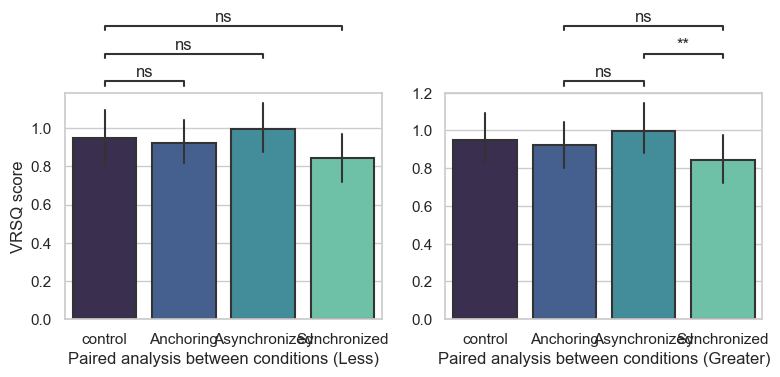

In [119]:

### pair analysis visualization 
# FileName= './survey/1-35/Clean/spatial31plot.csv'
# df_grouped = pd.read_csv(FileName)
# df_grouped.head()

df = P_fliterd_mean
## subplot
fig, axes = plt.subplots(1,2, figsize=(9,3), dpi=100)
# fig.suptitle('Bigger 1 row x 2 columns axes with no data')
# axes[0].set_title('Paired Analysis (Greater)')


sns.set(style = 'whitegrid')
x = 'group'
y = 'right_cogload_to0'
hue = 'group'
order = ['control', 'Anchoring', 'Asynchronized', 'Synchronized']
# order = ['Time_Junction_B', 'Time_Junction_H', 'Time_Junction_V', 'Time_Junction_M']

axes[0] = sns.barplot(ax = axes[0], data=df, x=x, y=y,
                palette = 'mako',
                linewidth=1.5,
                errcolor="0.2",errwidth =1.5,
                edgecolor=".2",
                # facecolor=(1, 1, 1, 0)
                )
test_results = add_stat_annotation(ax =axes[0],plot='barplot', data=df, x=x, y=y,
                                   box_pairs=[("control", "Anchoring"), ("control", "Asynchronized"), ("control", "Synchronized")],
                                   test='Wilcoxon', comparisons_correction=None, 
                                   text_format='star', loc='outside', verbose=1,
                                #    line_offset_to_box= -1,
                                #    line_offset= 1,
                                #    text_offset = -1,
                                   stats_params={'alternative': 'less'}
                                   )
axes[0].set(xlabel='Paired analysis between conditions (Less)', ylabel='VRSQ score')
axes[1] = sns.barplot(ax = axes[1],data=df, x=x, y=y,
                palette = 'mako',
                linewidth=1.5,
                errcolor="0.2",errwidth =1.5,
                edgecolor=".2",
                # facecolor=(1, 1, 1, 0)
                )
test_results = add_stat_annotation(ax =axes[1],plot='barplot', data=df, x=x, y=y,
                                   box_pairs=[("Asynchronized","Anchoring", ), ("Anchoring", "Synchronized"), ( "Synchronized","Asynchronized")],
                                   test='Wilcoxon', comparisons_correction=None, 
                                   text_format='star', loc='outside', verbose=1,
                                #    line_offset_to_box= -0.5,
                                #    line_offset= -0.5,
                                   stats_params={'alternative': 'greater'})
axes[1].set(xlabel='Paired analysis between conditions (Greater)', ylabel='')

In [11]:
### drop unclear data 
